# Supported Languages

The following languages are supported for detection:
- English
- Malayalam
- Hindi
- Tamil
- Portugeese
- French
- Dutch
- Spanish
- Greek
- Russian
- Danish
- Italian
- Turkish
- Sweedish
- Arabic
- German
- Kannada

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import pickle

In [2]:
# df = pd.read_csv('../data/processed/language_detection.csv')
df = pd.read_csv("../data/raw/language_detection.csv")
df.head()

,Text,Language
0,Nature is an inherent character or constituti...,English
1,In this general sense nature refers to the law...,English
2,"Although humans are part of nature, human acti...",English
3,[2] During the advent of modern scientific met...,English
4,"[3][4] With the Industrial Revolution, nature ...",English


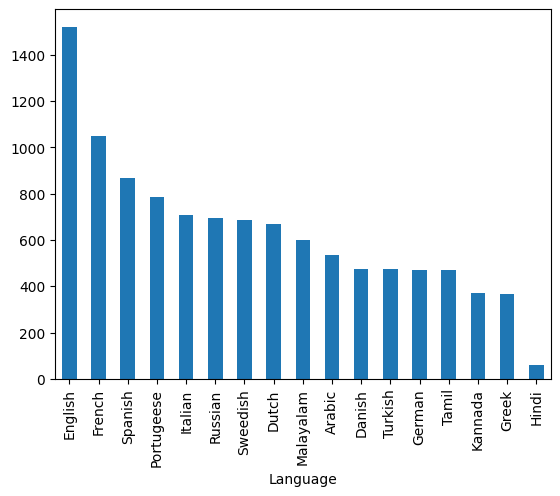

In [3]:
df["Language"].value_counts()
df["Language"].value_counts().plot(kind="bar")

plt.show()

In [4]:
X = df["Text"]
y = df["Language"]

In [5]:
print(len(X))
print(len(X[1]))
print(len(X[10]))

10802
110
260


In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(np.unique(y_encoded))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [7]:
import re

In [8]:
print(type(X))

<class 'pandas.core.series.Series'>


In [9]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', " ", text)
    text = re.sub(r"[[]]", " ", text)
    text = text.lower()
    data_list.append(text)


# data_list = (
#     X.astype(str)
#      .str.replace(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', regex=True)
#      .str.replace(r'\[|\]', ' ', regex=True)
#      .str.lower()
#      .tolist()
# )


/tmp/ipykernel_780946/2544791663.py:4: FutureWarning: Possible nested set at position 1
  text = re.sub(r"[[]]", " ", text)


In [10]:
print(len(data_list))

10802


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
# X_vectorized = vectorizer.fit_transform(data_list).toarray()
X_vectorized = vectorizer.fit_transform(data_list)

In [12]:
print(type(X_vectorized))
X_vectorized.shape

<class 'scipy.sparse._csr.csr_matrix'>


(10802, 40873)

In [26]:
# Non-Vectorized Value of X
print(X.iloc[2])

Although humans are part of nature, human activity or humans as a whole are often described as at times at odds, or outright separate and even superior to nature.


In [ ]:
# Import pandas and set display options
import pandas as pd

pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full content of each column
pd.set_option(
    "display.expand_frame_repr", False
)  # Prevent wrapping of DataFrame output

In [27]:
# Vectorized Value of X
print(X_vectorized[2])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 22 stored elements and shape (1, 40873)>
  Coords	Values
  (0, 17215)	2
  (0, 18366)	2
  (0, 17942)	1
  (0, 1842)	2
  (0, 28291)	1
  (0, 25833)	1
  (0, 1162)	1
  (0, 966)	1
  (0, 12431)	2
  (0, 1696)	2
  (0, 18833)	1
  (0, 12419)	1
  (0, 315)	1
  (0, 17996)	1
  (0, 6542)	1
  (0, 1972)	2
  (0, 25790)	1
  (0, 17937)	1
  (0, 18566)	1
  (0, 23172)	1
  (0, 9156)	1
  (0, 24807)	1


In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    X_vectorized, y_encoded, test_size=0.2, random_state=42
)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.978713558537714


In [36]:
print(classification_report(y_test, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       102
      Danish       1.00      0.92      0.96       102
       Dutch       0.98      0.99      0.98       124
     English       0.90      1.00      0.95       304
      French       0.98      1.00      0.99       233
      German       0.99      0.95      0.97        78
       Greek       1.00      0.96      0.98        73
       Hindi       1.00      1.00      1.00        13
     Italian       1.00      0.99      1.00       135
     Kannada       1.00      0.95      0.97        80
   Malayalam       0.99      0.99      0.99       113
  Portugeese       1.00      0.98      0.99       147
     Russian       1.00      0.97      0.98       144
     Spanish       0.99      0.99      0.99       179
    Sweedish       0.98      0.99      0.98       139
       Tamil       1.00      0.99      0.99        96
     Turkish       1.00      0.95      0.97        99

    accuracy              

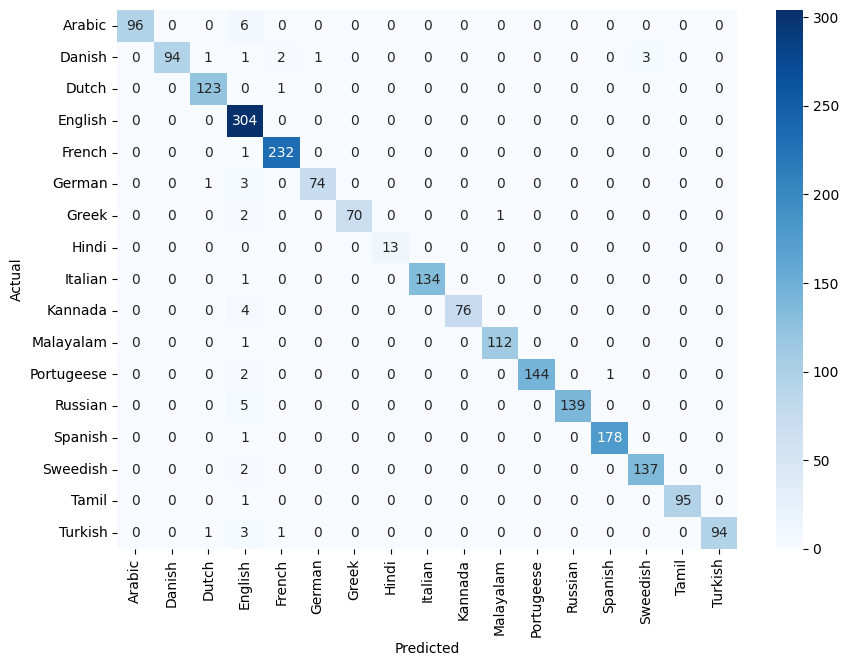

In [37]:
confusion = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_,
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
pickle.dump(vectorizer, open("../models/language_detection_vectorizer.pkl", "wb"))
pickle.dump(model, open("../models/language_detection_model.pkl", "wb"))